In [ ]:
!unzip '/content/drive/MyDrive/Fiver/archive.zip'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [30]:
tf_dataset = tf.keras.utils.image_dataset_from_directory('/content/Training',shuffle=True,
                                                         batch_size=64,image_size=(150,150))

Found 5712 files belonging to 4 classes.


In [31]:
tf_dataset.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [32]:
len(tf_dataset)

90

In [33]:
train_ds = len(tf_dataset)*0.8
train_ds

72.0

In [34]:
train_ds = tf_dataset.take(65)
rem_test_ds = tf_dataset.skip(65)
test_ds = rem_test_ds.take(5)
val_ds = rem_test_ds.skip(5)

In [35]:
print('train_ds=',len(train_ds))
print('test_ds=',len(test_ds))
print('val_ds=',len(val_ds))

train_ds= 65
test_ds= 5
val_ds= 20


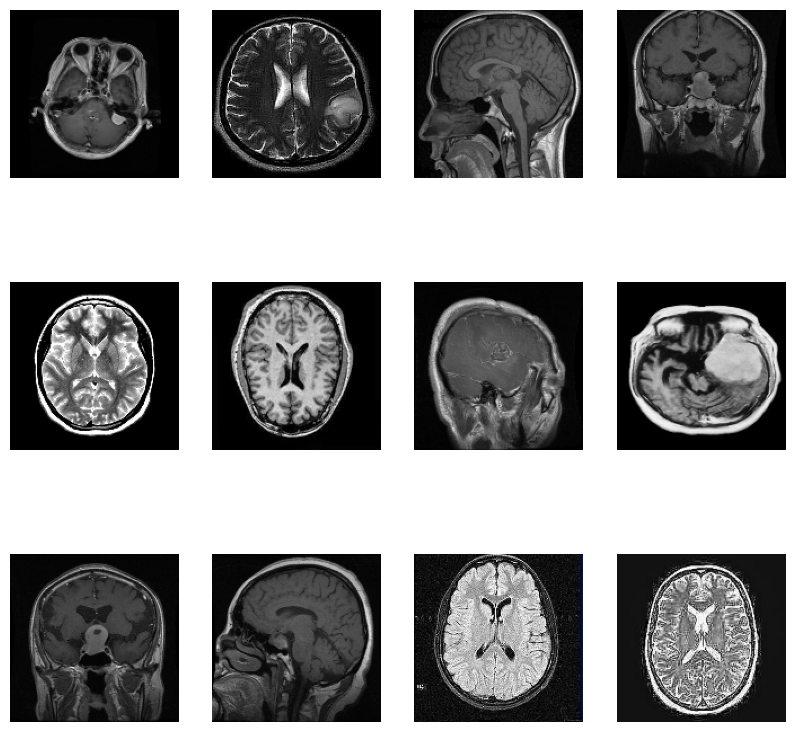

In [36]:
plt.figure(figsize=(10,10))
for img,lbl in train_ds.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.axis("off")
   

In [37]:
train_ds=train_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)

In [38]:
resample_rearrange = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(150,150),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [40]:
batch_size=64
image_size=150
channels=3
input_shape = (image_size,image_size,channels)
classes = len(tf_dataset.class_names)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [42]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [43]:
history = model.fit(train_ds,validation_data=val_ds, epochs=30,verbose=1)

Epoch 1/30
65/65 [==============================] - 14s 174ms/step - loss: 9.0240 - accuracy: 0.6142 - val_loss: 0.6413 - val_accuracy: 0.7573
Epoch 2/30
65/65 [==============================] - 3s 43ms/step - loss: 0.5116 - accuracy: 0.8147 - val_loss: 0.4965 - val_accuracy: 0.8190
Epoch 3/30
65/65 [==============================] - 3s 43ms/step - loss: 0.3773 - accuracy: 0.8690 - val_loss: 0.4089 - val_accuracy: 0.8799
Epoch 4/30
65/65 [==============================] - 3s 46ms/step - loss: 0.2630 - accuracy: 0.9072 - val_loss: 0.3242 - val_accuracy: 0.9018
Epoch 5/30
65/65 [==============================] - 3s 47ms/step - loss: 0.2050 - accuracy: 0.9274 - val_loss: 0.3157 - val_accuracy: 0.9058
Epoch 6/30
65/65 [==============================] - 3s 43ms/step - loss: 0.1652 - accuracy: 0.9428 - val_loss: 0.3457 - val_accuracy: 0.9148
Epoch 7/30
65/65 [==============================] - 3s 43ms/step - loss: 0.1624 - accuracy: 0.9404 - val_loss: 0.2865 - val_accuracy: 0.9205
Epoch 8/30


In [44]:
model.evaluate(test_ds)

5/5 [==============================] - 7s 24ms/step - loss: 0.3580 - accuracy: 0.9469


[0.3579798638820648, 0.9468749761581421]

2/2 [==============================] - 0s 8ms/step


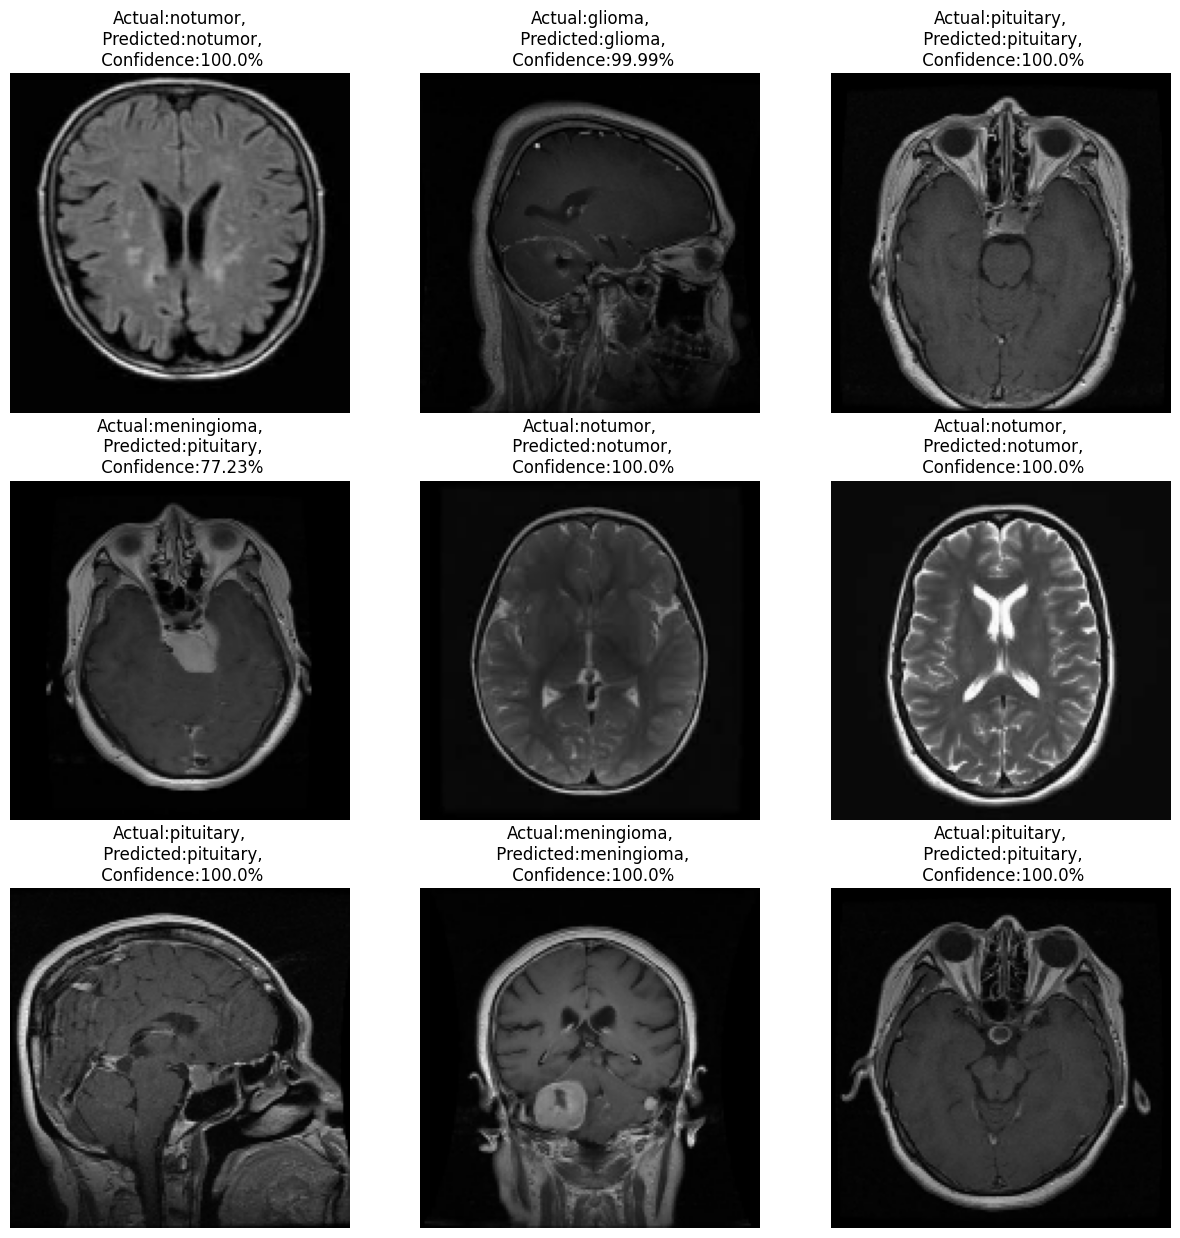

In [19]:
plt.figure(figsize=(15,15))
for img,lbl in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        pred = model.predict(img)
        pred_class = tf_dataset.class_names[np.argmax(pred[i])]
        confidence = round(100*(np.max(pred[i])),2)
        actual_class = tf_dataset.class_names[lbl[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{pred_class},\n Confidence:{confidence}%")
        plt.axis('off')

In [45]:
model.save(f"/content/drive/MyDrive/Fiver/brain_tumor1")

In [ ]:
import cv2
img = cv2.imread('/content/Testing/glioma/Te-glTr_0000.jpg')
img

In [52]:
img=image = cv2.resize(img, (150, 150))
red = model.predict(np.expand_dims(img,axis=0))

1/1 [==============================] - 0s 364ms/step


In [53]:
pred_class = tf_dataset.class_names[np.argmax(pred[i])]
pred_class

'notumor'